# Regression

*Regression* is fitting a function to a set of points representing inputs and outputs.  It's an attempt to find a pattern in the data, possibly for the purpose of predicting new output values for inputs that haven't been observed before.


Supervised machine learning tends to fall into two categories:  classification, which has categorical or boolean values as target outputs, and regression, which has continuous values as the output.  There are often regression versions of classification algorithms, but you can't perform regression with the classification version of the algorithm.

In data science, it's common to perform regressions to model and better understand data, even if it's just the simplest kind of regression, linear regression.  And the simplest kind of linear regression is one with one input ("independent variable") and one output ("dependent variable").  This kind of linear regression produces a simple line to model the relationship between one variable and another.

### Average temperature (in F) for the year in MA by year
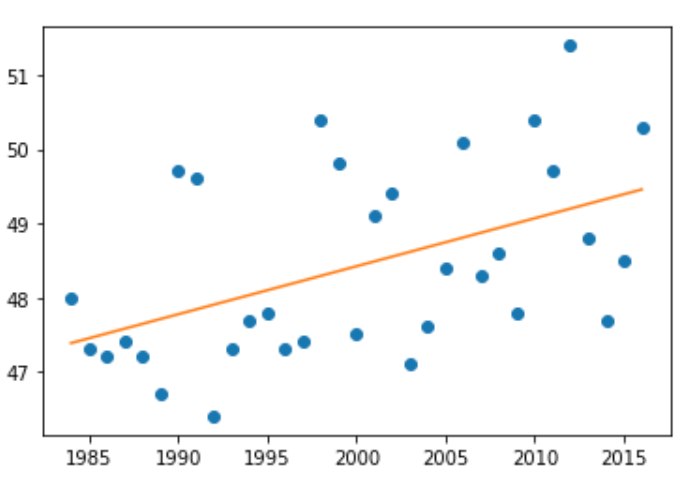

## Linear Regression

In a simple linear regression, we're trying to find the line of the form $\hat y = mx + b$ that is the best fit to the data.  The hat over $\hat y$ indicates that it's a prediction, not the value $y$ observed in the data.

"Best fit" could be defined a lot of different ways.  Here it's the line that minimizes the *residual sum of squares*, or the sum over all points of the square of the difference between the predicted value $\hat y_i$ and actual value $y_i$:  $RSS(\hat y,y) = \sum_i (\hat y_i - y_i)^2$.


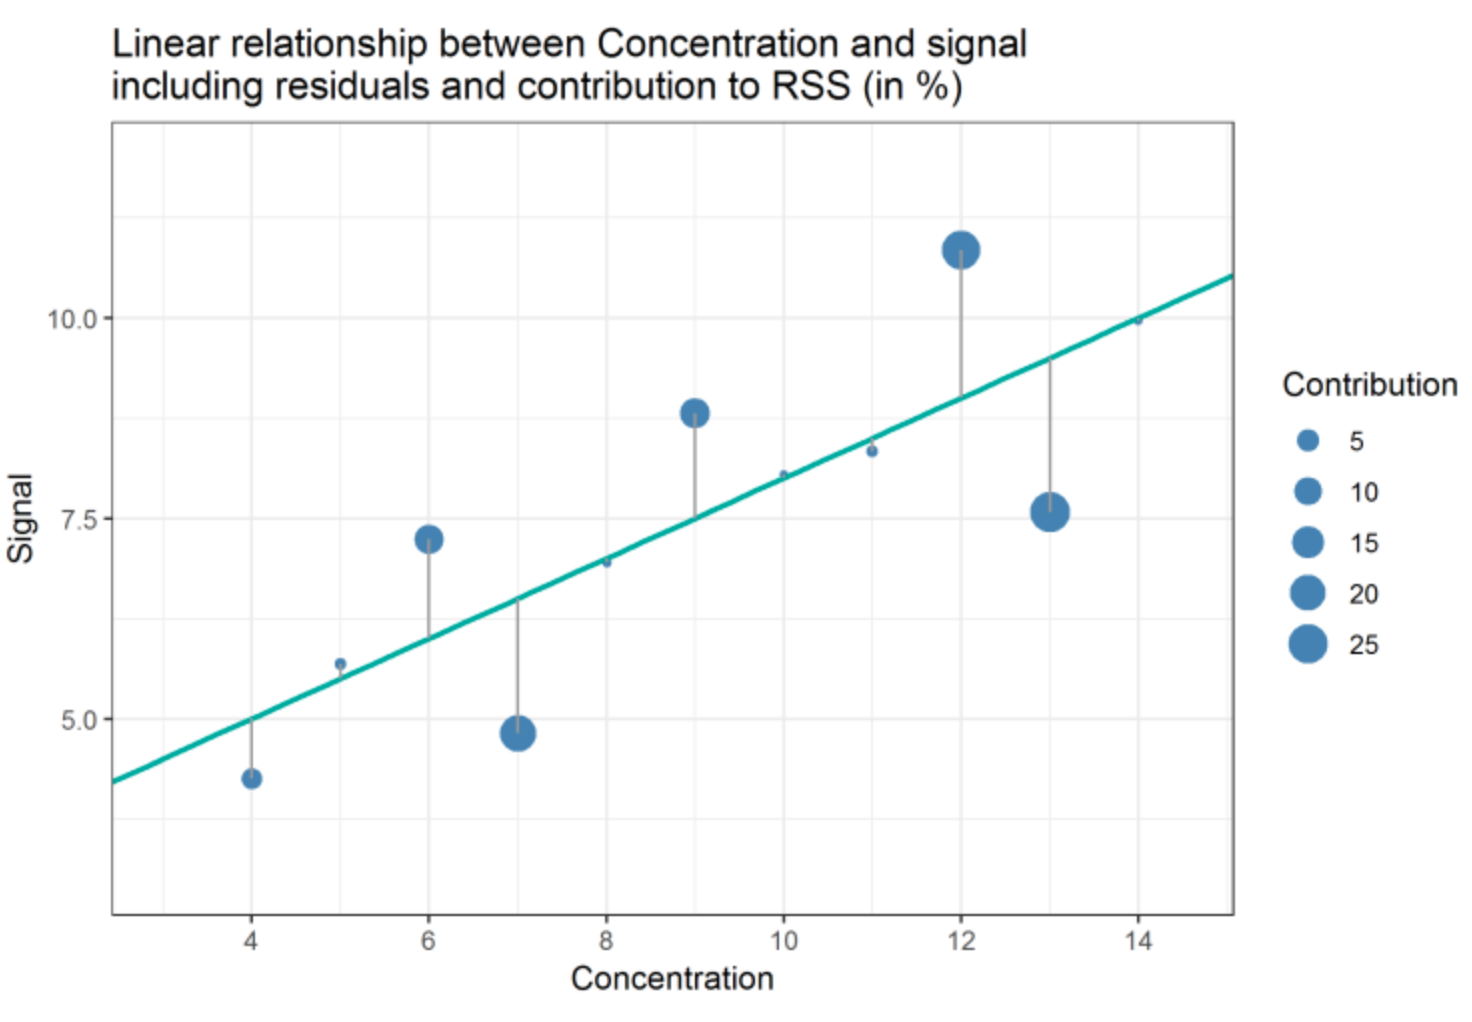

from https://mpl.loesungsfabrik.de/en/english-blog/method-validation/sum-of-quares-part1


There are good reasons that minimizing the sum of squared residuals is a good definition of what it means to fit best.  One is that it tends to avoid catastrophic errors where some points are really far from the line.  Since the penalty increases as the square of the residual, this penalizes the model for points far from the line more and more.  The model can't dump all its error into one point, but has to fit everything as best it can and spread out the error.

Other good reasons include that the minimum for this quantity has a nice closed form solution, which you'd cover in DS 120, and that it's the quantity to minimize if we think the residuals around the line are distributed like a Gaussian distribution (bell curve).  We won't really explore these ideas further here.

In DS 120, we go through the mathematics of how to solve for the right line in this setting.  But in Python, we can just import the right module to do these calculations for us.

Here are our points to fit.

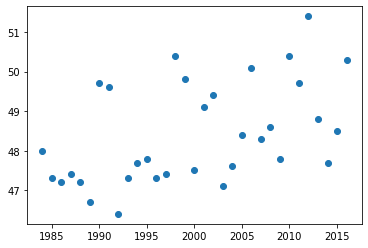

In [3]:
import numpy as np

# Data from https://www.wbur.org/news/2017/08/23/massachusetts-temperature-precipitation:
# Average temp for the year in F for MA, by year

x = np.linspace(1984, 2016, 33)
y = [48.0, 47.3, 47.2, 47.4, 47.2, 46.7,
     49.7, 49.6, 46.4, 47.3, 47.7, 47.8, 47.3, 47.4, 50.4, 49.8, 
     47.5, 49.1, 49.4, 47.1, 47.6, 48.4, 50.1, 48.3, 48.6, 47.8,
     50.4, 49.7, 51.4, 48.8, 47.7, 48.5, 50.3]
# Visualize the points:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')

The easiest way to get a linear regression in Python is probably to create a LinearRegression object from sklearn.linear_model.  The interface is very similar to scikit-learn's machine learning classifiers.

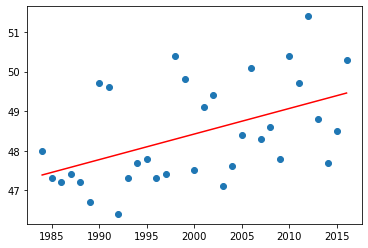

In [36]:
import sklearn.linear_model as lm

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')

The one surprising thing here is the call to reshape().   LinearRegression expects the x input to be a 2D array, with each row equal to a set of features for one data point.  It isn't expecting a 1D array, even though our simple x data only needs a 1D array to capture the data.  So we have to change [1985, 1986, ...] into [[1985],[1986],...].  

reshape()'s arguments are the dimensions of the new array, with -1 a wild card for "make it fit."  So the originally 1D array that calls reshape(-1,1) has 1 column and as many rows as necessary to get all the data.

The coefficients of the model are stored as the fields coef_ for the x-coefficient and intercept_ for the y-intercept.  coef_ is a list because in multiple regression, we could have more than one x variable and thus more than one x coefficient.

In [24]:
print('The temperture is rising ' + str(linear_model.coef_[0]) + ' degrees F per year')
print(linear_model.intercept_)

The temperture is rising 0.06477272727272723 degrees F per year
-81.12424242424237


The ability to interpret the coefficient as a rate is a nice advantage of linear regression over more complex model.  A climate model probably needs to be more complex than a single coefficient, but it's good to start with simple models and add complexity as needed.

To evaluate the goodness of fit of the line, one measure is the $R^2$ score, also called the coefficient of determination.  It's 1 if the points all lie exactly on the line, 0 if the fit is no better than a line that just returns the average $y$ for everything, and in between reflects how much of the variance of $y$ is explained by the line.  We can get this number with LinearRegression.score().

In [38]:
linear_model.score(x,y)

0.23967385644360317

## Multiple regression

Multiple regression refers to a linear regression that has more than one independent variable.  For example, rather than fitting the temperature to the year, we could fit it to multiple atmospheric factors such as methane and carbon dioxide concentrations.

Multiple regression tries to find a function $\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ that fits the data.  This function is still called "linear" because it is simply a weighted sum of its inputs and has no more complex functions in it.  That's good for getting a very direct sense of how important the different factors are to the outcome - you can just compare the coefficients.  But the fit is no longer visualizable as a line; it's a plane for 2 independent variables, and after that, we can't visualize the whole function, which is a "hyperplane."

Multiple regression is not really more complicated than the linear regression we just described, and it can be solved by the same techniques.  So a LinearRegression object can solve for a multiple regression as well.

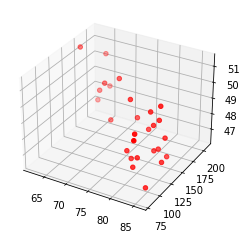

In [26]:
methane = np.array([12.81, 25.15, 38.06, 49.47, 60.24, 71.32,
     80.08, 94.14, 96.49, 100.32, 107.54, 111.50, 113.97, 120.26, 132.39, 134.82,
     133.30, 132.60, 135.91, 140.65, 135.76, 136.14, 138.11, 145.90, 152.41, 157.13,
     162.33, 167.15, 172.17, 177.86, 190.62, 200.65, 207.73])

# Carbon dioxide emissions from 1990-2016 in Mass, in millions of tons
# https://www.eia.gov/environment/emissions/state/
mass_co = [84, 82.7, 84.9, 81.7, 81.9, 79.2, 79.9, 85.9, 84.3, 81.9,
           82.9, 82.8,83.7, 85, 83.6, 85, 77.1, 80.4, 77.2, 70.6,
           72.0, 68.1, 61.9, 65.7, 63.8, 65.6, 63.9]
y_from_90 = y[6:]  # From the last example, these are the temperatures
methane_from_90 = methane[6:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass_co, methane_from_90, y_from_90, color = 'red')

In this case, we just need to prepare the X matrix so that the rows correspond to different datapoints, making each column a different feature.  It's easiest to create an array with the features as the rows, then transpose this matrix.

In [28]:
x = np.transpose(np.array([mass_co, methane_from_90]))
x

array([[ 84.  ,  80.08],
       [ 82.7 ,  94.14],
       [ 84.9 ,  96.49],
       [ 81.7 , 100.32],
       [ 81.9 , 107.54],
       [ 79.2 , 111.5 ],
       [ 79.9 , 113.97],
       [ 85.9 , 120.26],
       [ 84.3 , 132.39],
       [ 81.9 , 134.82],
       [ 82.9 , 133.3 ],
       [ 82.8 , 132.6 ],
       [ 83.7 , 135.91],
       [ 85.  , 140.65],
       [ 83.6 , 135.76],
       [ 85.  , 136.14],
       [ 77.1 , 138.11],
       [ 80.4 , 145.9 ],
       [ 77.2 , 152.41],
       [ 70.6 , 157.13],
       [ 72.  , 162.33],
       [ 68.1 , 167.15],
       [ 61.9 , 172.17],
       [ 65.7 , 177.86],
       [ 63.8 , 190.62],
       [ 65.6 , 200.65],
       [ 63.9 , 207.73]])

In [33]:
temp_model = LinearRegression()
temp_model.fit(x,y_from_90)
print(temp_model.coef_)
print(temp_model.intercept_)

[-0.0601007   0.00038069]
53.282030034729374


Plotting the fit is a little more complex than getting the fit.  We want to evaluate the fit function for every point in a grid of (x,y) coordinates.  np.meshgrid() takes two sequences as arguments, like range(2) and range(3), that represent the ranges of x and y, and returns the list of x coordinates in a grid and the list of y coordinates in that same grid, like [0, 0, 0, 1, 1, 1] and [0, 1, 2, 0, 1, 2].  These lists can then be used in the equation for the fit, and a list of z-coordinates can be produced that way.  plot_surface() then takes the x-coordinate list, y-coordinate list, and z-coordinate list and plots an interpolated surface with the points implied by the lists.

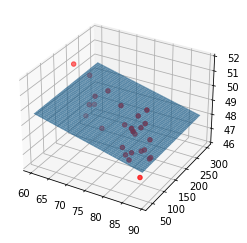

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mass_co, methane_from_90, y_from_90, color = 'red')
xx, yy = np.meshgrid(range(60,90), range(40,300))
yhat = xx * temp_model.coef_[0] + yy * temp_model.coef_[1] + temp_model.intercept_
ax.set_zlim3d(46, 52)
ax.plot_surface(xx,yy,yhat, alpha=0.7)

## Exponential growth

Exponential growth appears nonlinear at first - it's a curve instead of a flat line.  But if you take the log of the y coordinates of an exponential curve, you get points that lie on a straight line, which can then be fit with linear regression.

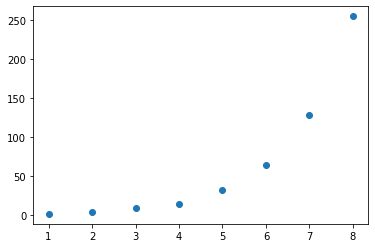

In [41]:
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8])
y = np.array([2,5,9,15,33,65,128,255])  # Almost powers of 2
plt.plot(x,y,'o')

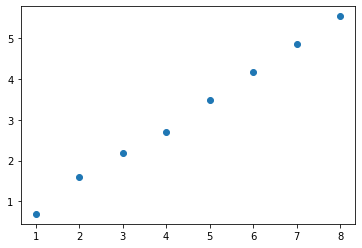

In [42]:
logy = np.log(y)
plt.plot(x,logy,'o')

The equation for an exponential curve is $\hat y = Ce^{mx}$.  Taking the log of both sides gives $\log y = \log C + mx$.  This has the $y = mx + b$ form except that it uses log y instead of y, and we'll need to transform $b = \log C$ back to $C$ in the end by raising $e^b$.

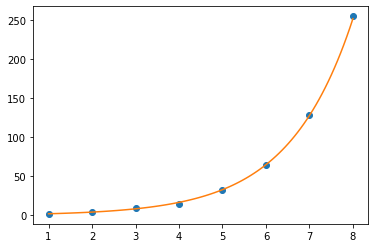

In [45]:
exp_model = LinearRegression()
x = x.reshape(-1,1)
exp_model.fit(x,logy)
C = np.exp(exp_model.intercept_)
m = exp_model.coef_[0]
# The rest is for plotting
xhat = np.linspace(1,8,100)
yhat = C * np.exp(m * xhat)
plt.plot(x,y,'o')
plt.plot(xhat,yhat) # Will look slightly jagged because few samples

## Polynomial regression

Polynomials are also close enough to being linear that we can use linear regression methods to fit them as well.  If we're trying to find a function of the form $\hat y = \beta_0 + \beta_1 x + \beta_2 x^2$, that looks linear as long as we treat $x^2$ as if it was a separate variable; we pretend this is just a different input to the equation. Then we can use multiple regression to find the coefficients.

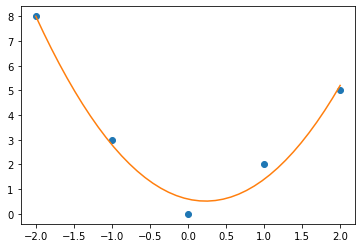

In [48]:
x1 = [-2, -1, 0, 1, 2]
x2 = [x_item ** 2 for x_item in x1]
y = [8, 3, 0, 2, 5]
x = np.transpose([x2, x1])
parabola = LinearRegression()
parabola.fit(x,y)
xhat = np.linspace(-2, 2, 40)
yhat = [parabola.coef_[0] * x_item ** 2 + parabola.coef_[1] * x_item + parabola.intercept_ for x_item in xhat]
plt.plot(x1,y,'o')
plt.plot(xhat,yhat)

## Nonlinear regression

Sometimes - often? - we care more about a tight fit to the data than making sure the function has a neat, concise form.  Regression doesn't need to be linear - it could produce a very complex function that fits the data well.  With this added complexity comes the possibility of overfitting, just like with classification in ML.  In fact, several machine learning methods have regression versions where the trained model produces numerical predictions instead of classifications.

One such machine learning method is decision trees.  Instead of each leaf producing a classification, each leaf can produce a different linear fit to the data.  The result is a method that fits its data with linear pieces where the features of the example determine which linear fit is used.  This is another tool in scikit-learn that you could use to fit the data.

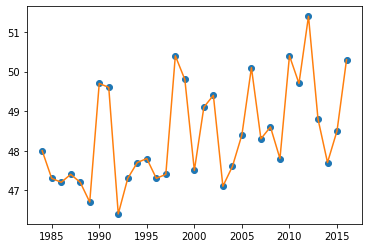

In [6]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
x = np.linspace(1984, 2016, 33)
x = x.reshape(-1,1)
y = [48.0, 47.3, 47.2, 47.4, 47.2, 46.7,
     49.7, 49.6, 46.4, 47.3, 47.7, 47.8, 47.3, 47.4, 50.4, 49.8, 
     47.5, 49.1, 49.4, 47.1, 47.6, 48.4, 50.1, 48.3, 48.6, 47.8,
     50.4, 49.7, 51.4, 48.8, 47.7, 48.5, 50.3]
model.fit(x,y)
yhat = model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,yhat)

This is almost certainly overfitting, the way the fit hits each point exactly.  We'd need to tinker with the parameters of the regressor to avoid that, introducing pruning somehow.  Like introducing a maximum depth to the tree.

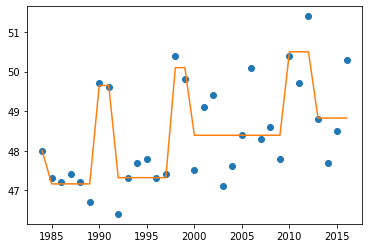

In [7]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x,y)
yhat = model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,yhat)

Random forests have their own regression method, too.  Instead of voting, the fits from different trees get averaged.

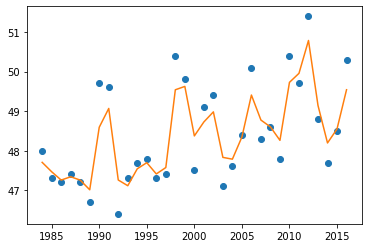

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)
yhat = model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,yhat)

There's even a regression version of k-Nearest Neighbors:  each point averages the values of its k neighbors.

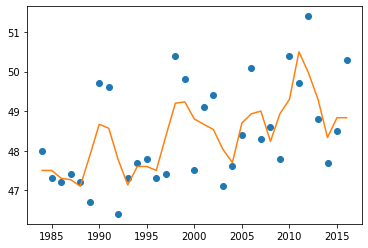

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x,y)
yhat = model.predict(x)
plt.plot(x,y,'o')
plt.plot(x,yhat)


Neural networks also offer a way to do nonlinear regression, but they're beyond the scope of this course.

Whether these methods are better or worse than linear regression boils down to two main questions.

* First, how much does it matter to you that your model is easily describable and understandable?
* Second, does the added complexity predict withheld points in a test set better than the linear method, or is it merely overfitting?

The answers to these questions will differ from application to application and dataset to dataset.